In [1]:
import pandas as pd
import preprocess
import network
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
np.math = math
from idtxl.data import Data
from idtxl.multivariate_te import MultivariateTE
from idtxl.visualise_graph import plot_network
import pickle

In [3]:
# Define assets and file paths
assets = ["commodity", "credit", "currency", "energy", "equity", "interest", "metals", "real_estate", "volatility"]
file_paths = {asset: f"../data/{asset}_data.xlsx" for asset in assets}

# Load data
aligned_data, tickers = preprocess.load_and_align_data(file_paths)

# Drop tickers with many missing points
aligned_data, tickers = preprocess.drop_short_tickers(aligned_data, tickers, max_nan=50)
aligned_data['GB03'] + 0.1

# Compute log returns
log_returns = preprocess.compute_log_returns(aligned_data)

# Interest data has negative and zero values
# interest_data = aligned_data[tickers['interest']]
# log_returns[tickers["interest"]] = interest_data

# Drop NA
log_returns = log_returns.dropna()

abs_log_returns = np.abs(log_returns)

Tickers to drop/replace due to insufficient data:
['FXJPEMCS', 'QCLN']


c:\Users\akhma\OneDrive\Onenote\Python\my_venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

invalid value encountered in log



In [5]:
discrete_log_returns = preprocess.discretize_df(log_returns, num_bins=2)

In [8]:
def idtxl_multi_te(data, settings):
    data_array = data.to_numpy()
    data_array = data_array - data_array.min()  # shift labels to start at 0
    data_array = np.expand_dims(data_array, axis=2)

    data = Data(normalise=False)
    data.set_data(data_array, dim_order='spr')

    network_analysis = MultivariateTE()

    results = network_analysis.analyse_network(settings=settings, data=data)

    results.print_edge_list(weights="max_te_lag", fdr=False)
    plot_network(results=results, weights="max_te_lag", fdr=False)
    plt.show()

    return results

In [ ]:
def windows_multi_te(windows, settings):
    windows_results = []
    for (_, _, window_data) in windows:
        results = idtxl_multi_te(data=window_data, settings=settings)
        windows_results.append(results)
    return windows_results

Adding data with properties: 30 processes, 1477 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

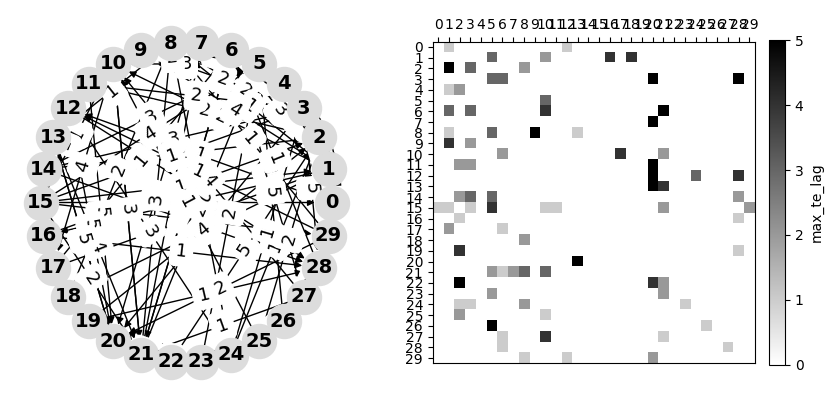

Adding data with properties: 30 processes, 1443 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

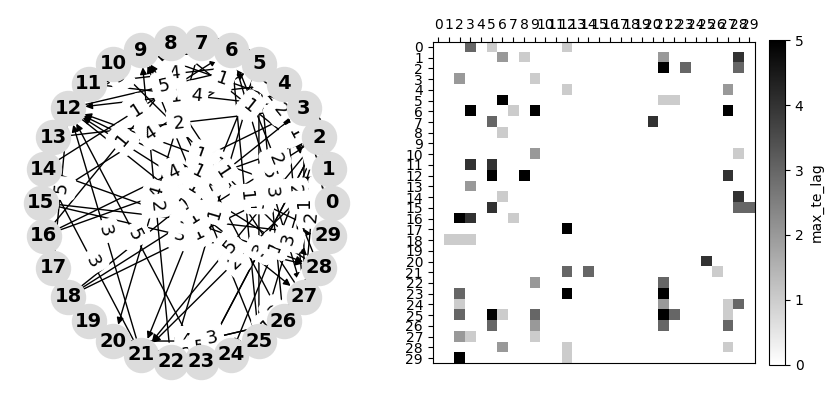

Adding data with properties: 30 processes, 1435 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

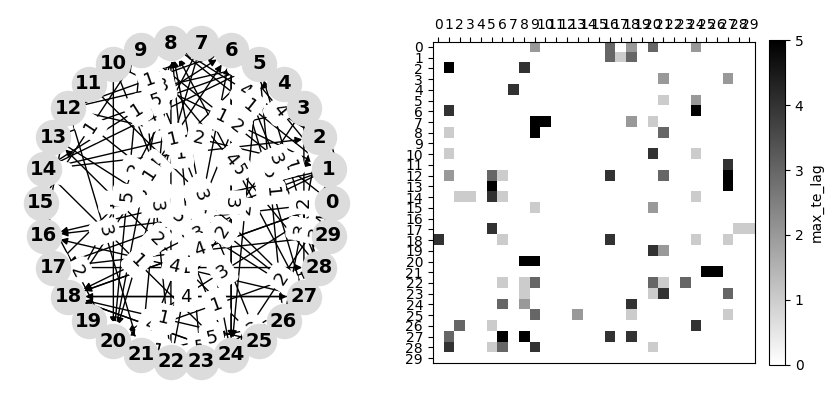

Adding data with properties: 30 processes, 1471 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 3) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

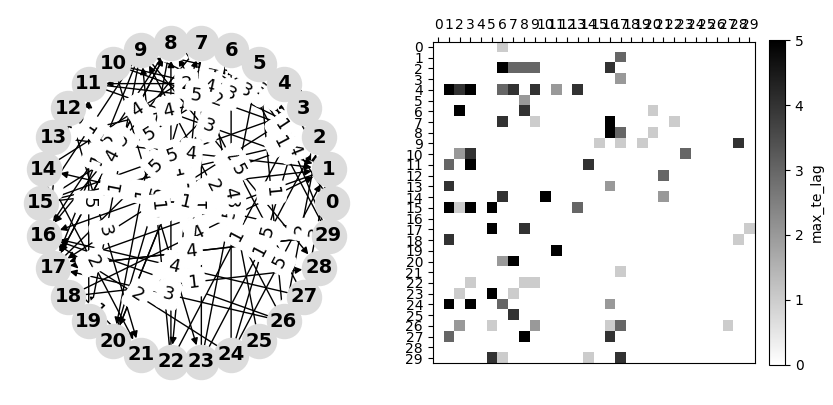

Adding data with properties: 30 processes, 1493 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

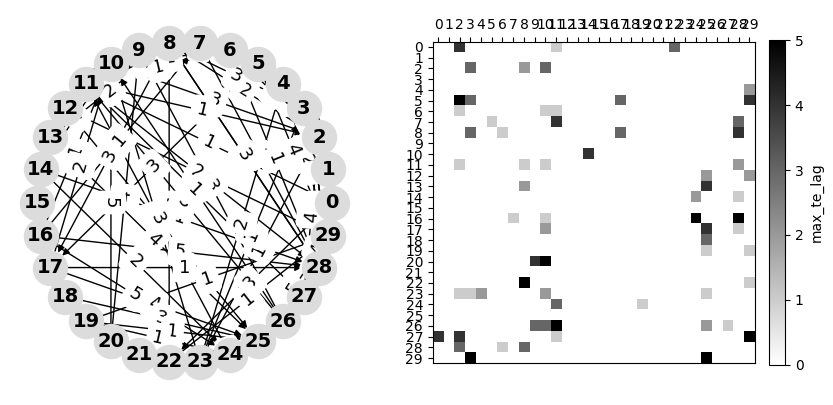

In [15]:
window_len = 6
window_step = 3
windows = preprocess.sliding_window(discrete_log_returns, 
                                    window_len, 
                                    window_step, 
                                    window_unit="years", 
                                    step_unit="years")
endpoints = [end_date for _, end_date, _ in windows]

settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(discrete_log_returns) + 1 
}

windows_results = windows_multi_te(windows, settings)

In [16]:
with open("idtxl_windows_6_3_log_returns_tickers_discrete_equal_freq_2_bins", "wb") as f:
    pickle.dump(windows_results, f)

Adding data with properties: 30 processes, 1477 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 3) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\network_inference.py:1015: RuntimeWarning:

invalid value encountered in cast

C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\network_inference.py:1022: RuntimeWarning:

invalid value encountered in cast

C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\stats.py:553: RuntimeWarning:

invalid value encountered in cast



testing candidate: (1, 1) maximum statistic, n_perm: 200
testing candidate: (1, 4) maximum statistic, n_perm: 200
testing candidate: (1, 3) maximum statistic, n_perm: 200
testing candidate: (1, 5) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(0, np.int64(1)), (0, np.int64(2)), (0, np.int64(3)), (0, np.int64(4)), (0, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.int64(1)), (4, np.int64(2)), (4, np.int64(3)), (4, np.int64(4)), (4, np.int64(5)), (5, np.int64(1)), (5, np.int64(2)), (5, np.int64(3)), (5, np.int64(4)), (5, np.int64(5)), (6, np.int64(1)), (6, np.int64(2)), (6, np.int64(3)), (6, np.int64(4)), (6, np.int64(5)), (7, np.int64(1)), (7, np.int64(2)), (7, np.int64(3)), (7, np.int64(4)), (7, np.int64(5)), (8, np.int64(1)), (8, np.int64(2)), (8, np.int64(3)), (8, np.int64

C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\data.py:274: RuntimeWarning:

invalid value encountered in cast



testing candidate: (18, np.int64(1)) maximum statistic, n_perm: 200
testing candidate: (27, np.int64(4)) maximum statistic, n_perm: 200
testing candidate: (26, np.int64(1)) maximum statistic, n_perm: 200
testing candidate: (11, np.int64(4)) maximum statistic, n_perm: 200
testing candidate: (9, np.int64(1)) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(18, np.int64(1)), (27, np.int64(4)), (26, np.int64(1)), (11, np.int64(4))]
testing candidate: (18, np.int64(1)) minimum statistic, n_perm: 500
 -- significant

---------------------------- (4) final statistics
selected variables: [(2, 1), (18, np.int64(1)), (27, np.int64(4)), (26, np.int64(1)), (11, np.int64(4))]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 4 selected sources
removing 0 variables after seq. max stats
final source samples: [(18, np.int64(1)), (27, np.int64(4)), (26, np.int64(1)), (11, np.int

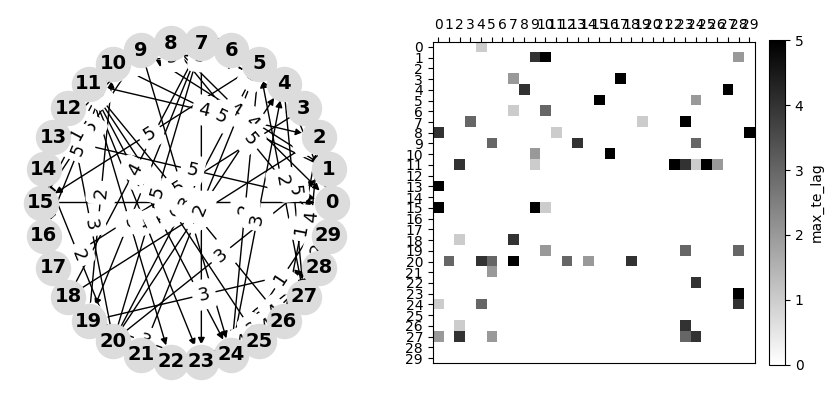

Adding data with properties: 30 processes, 1443 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3,

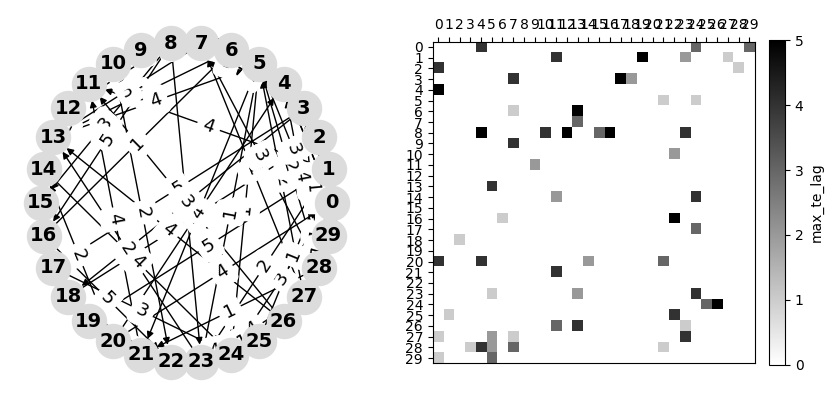

Adding data with properties: 30 processes, 1435 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, n

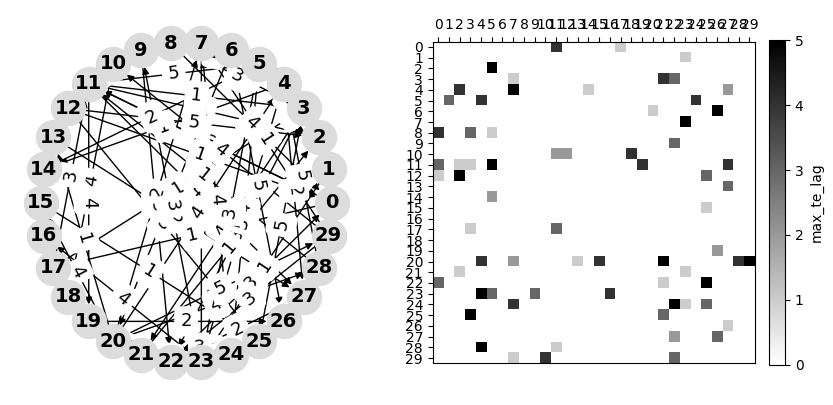

Adding data with properties: 30 processes, 1471 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.i

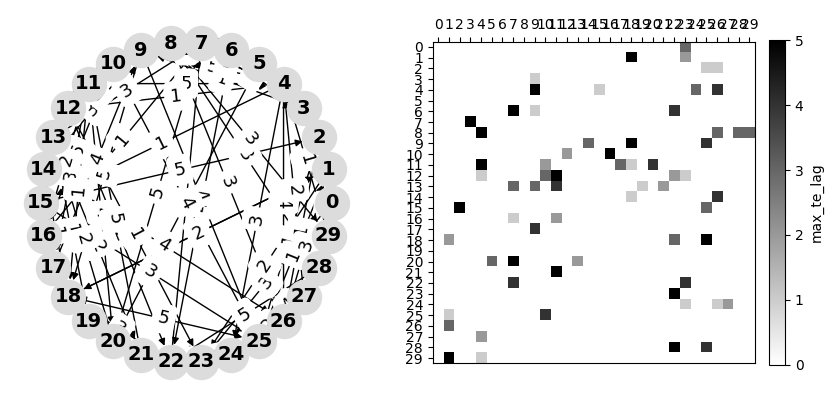

Adding data with properties: 30 processes, 1493 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (

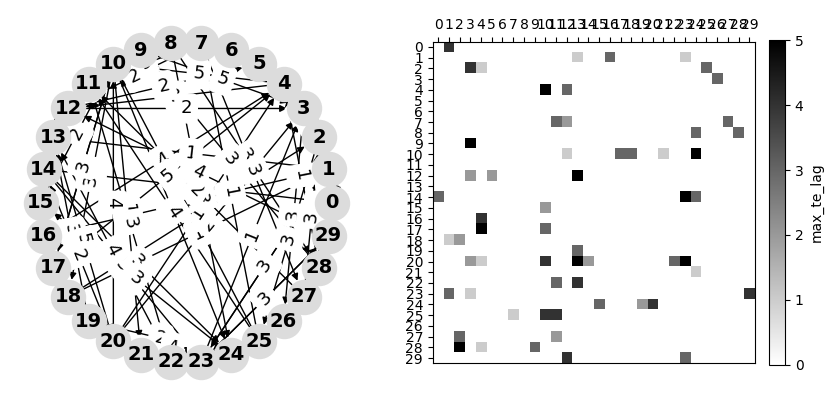

In [17]:
discrete_log_returns = preprocess.discretize_df(log_returns, num_bins=3)
window_len = 6
window_step = 3
windows = preprocess.sliding_window(discrete_log_returns, 
                                    window_len, 
                                    window_step, 
                                    window_unit="years", 
                                    step_unit="years")
endpoints = [end_date for _, end_date, _ in windows]

settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(discrete_log_returns) + 1 
}

windows_results = windows_multi_te(windows, settings)

In [18]:
with open("idtxl_windows_6_3_log_returns_tickers_discrete_equal_freq_3_bins", "wb") as f:
    pickle.dump(windows_results, f)

Adding data with properties: 30 processes, 494 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 5) 
maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200
testing candidate: (0, 4) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2

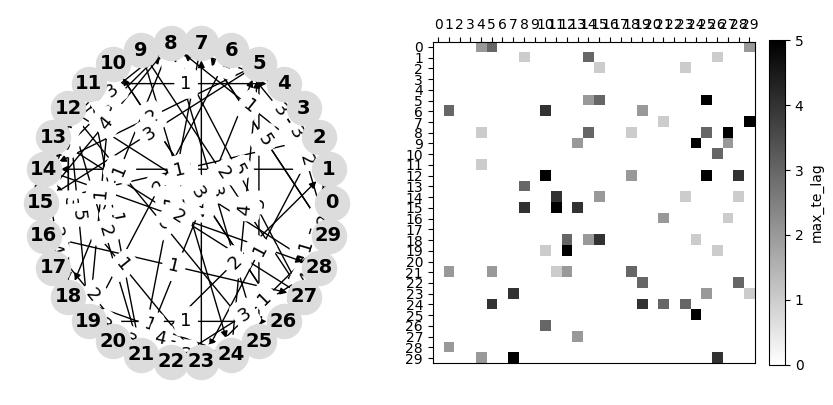

Adding data with properties: 30 processes, 496 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

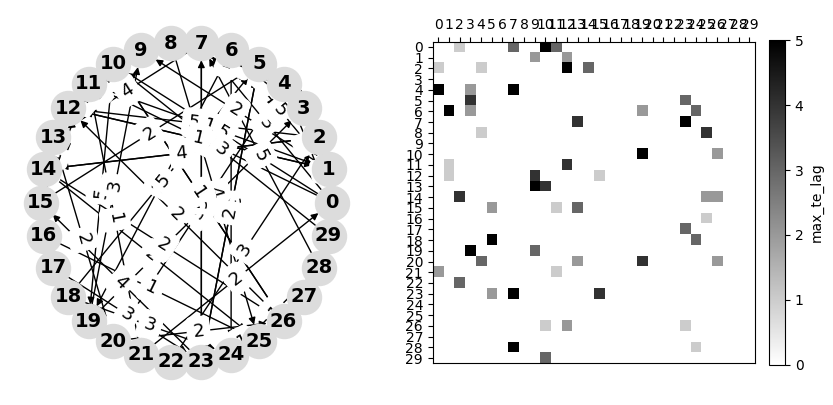

Adding data with properties: 30 processes, 491 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 3) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

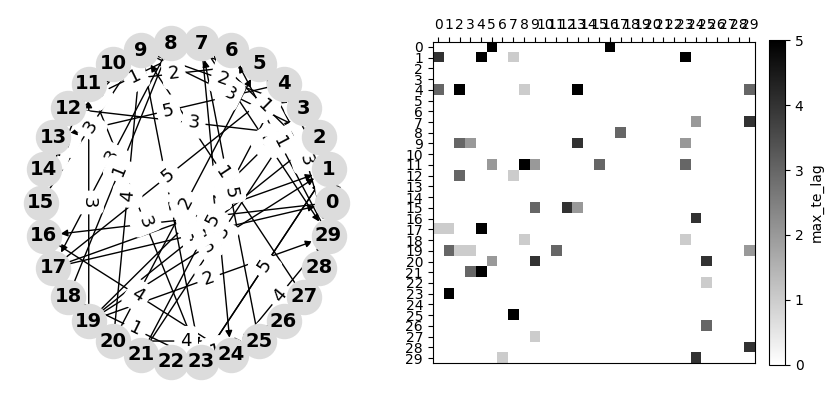

Adding data with properties: 30 processes, 486 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 3) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

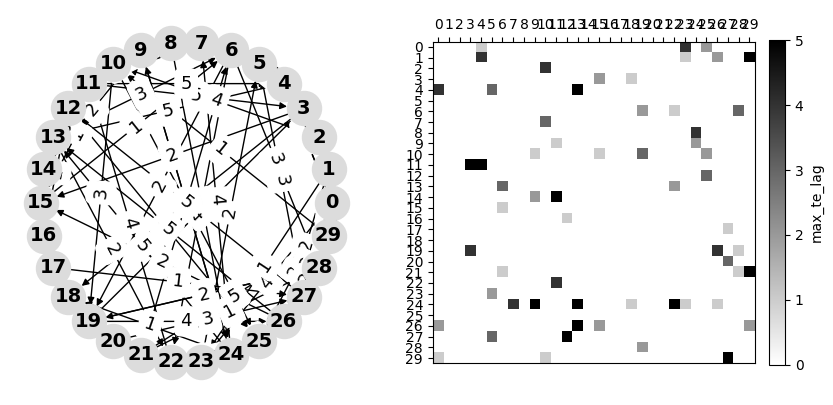

Adding data with properties: 30 processes, 492 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

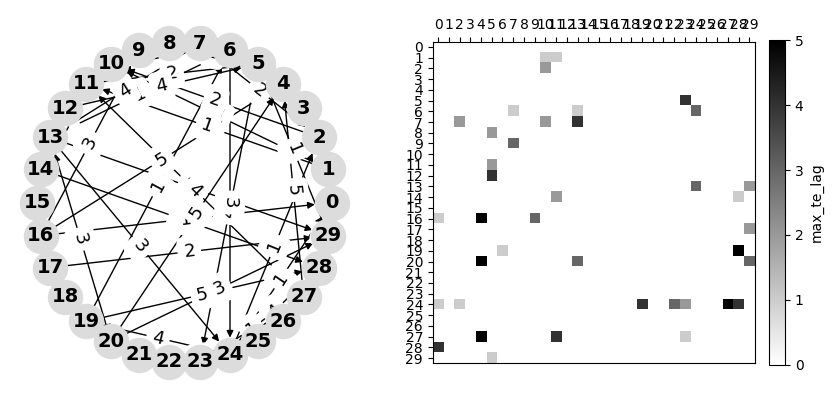

Adding data with properties: 30 processes, 460 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200
testing candidate: (0, 3) maximum statistic, n_perm: 200
testing candidate: (0, 2) maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2

C:\Users\akhma\OneDrive\Onenote\Python\IDTxl\idtxl\stats.py:560: RuntimeWarning:

invalid value encountered in cast



testing candidate: (16, np.int64(1)) maximum statistic, n_perm: 200
testing candidate: (27, np.int64(3)) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(16, np.int64(1))]
 -- significant

---------------------------- (4) final statistics
selected variables: [(2, 1), (2, 2), (2, 5), (2, 4), (16, np.int64(1))]
omnibus test, n_perm: 500
 -- significant

sequential maximum statistic, n_perm: 500, testing 1 selected sources
removing 0 variables after seq. max stats
final source samples: [(16, np.int64(1))]
final target samples: [(2, 1), (2, 2), (2, 5), (2, 4)]



####### analysing target with index 3 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 3 - testing sources [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candida

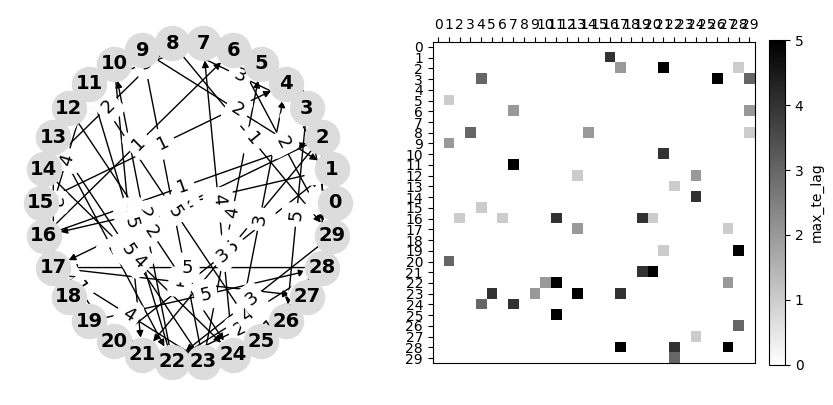

Adding data with properties: 30 processes, 462 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 3) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

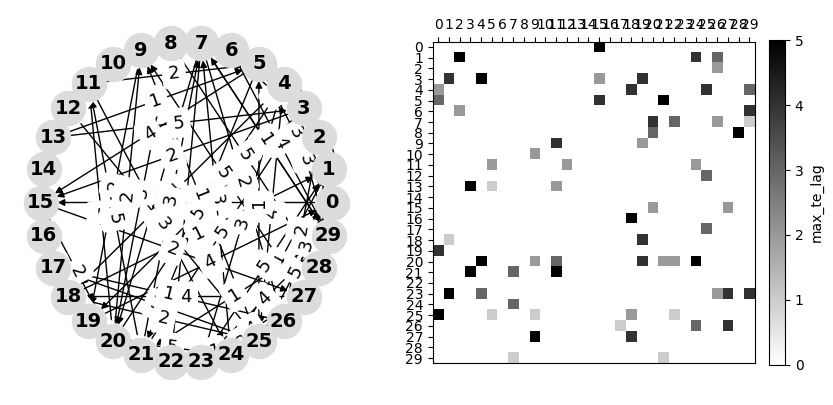

Adding data with properties: 30 processes, 497 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 5) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

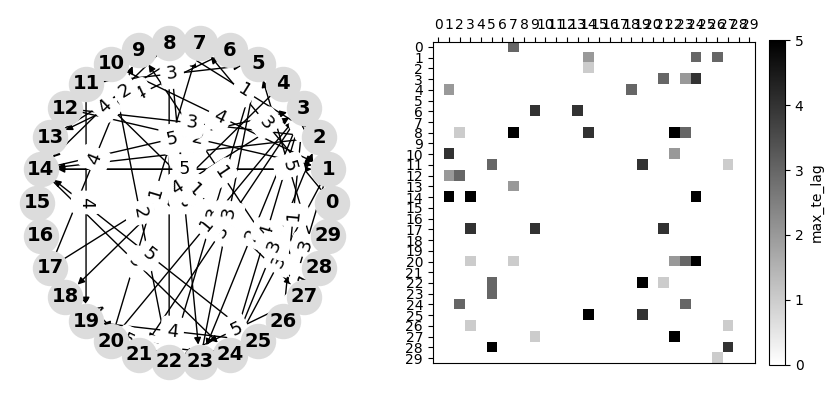

Adding data with properties: 30 processes, 495 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 5) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

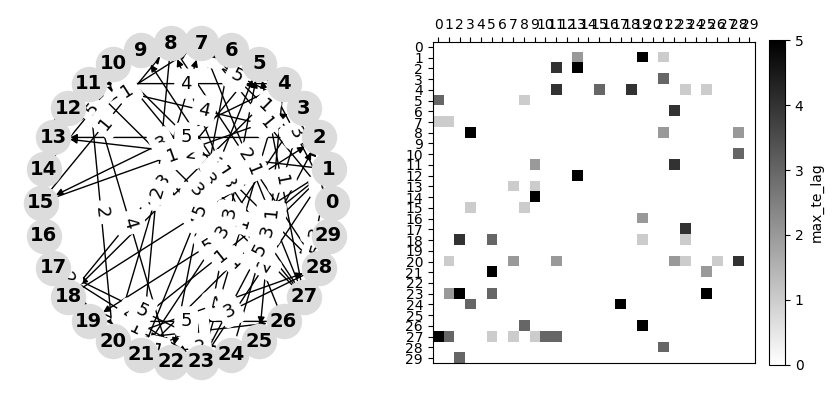

Adding data with properties: 30 processes, 482 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.in

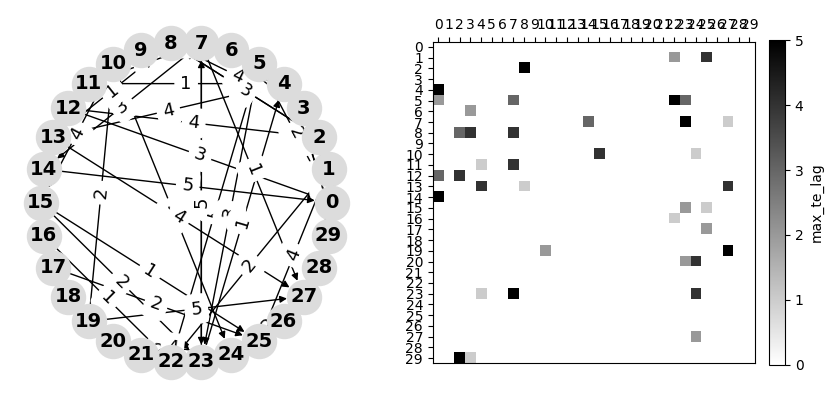

Adding data with properties: 30 processes, 478 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

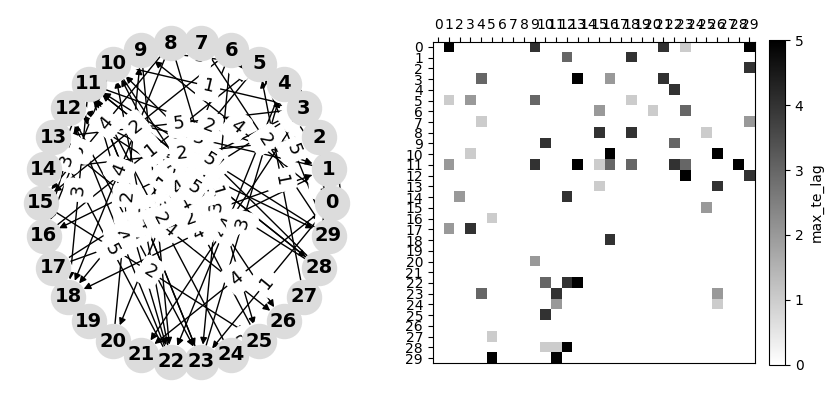

Adding data with properties: 30 processes, 490 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

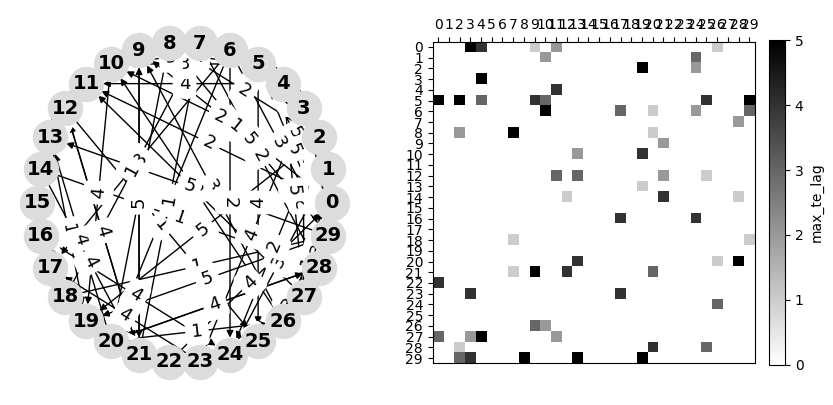

Adding data with properties: 30 processes, 496 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 2) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

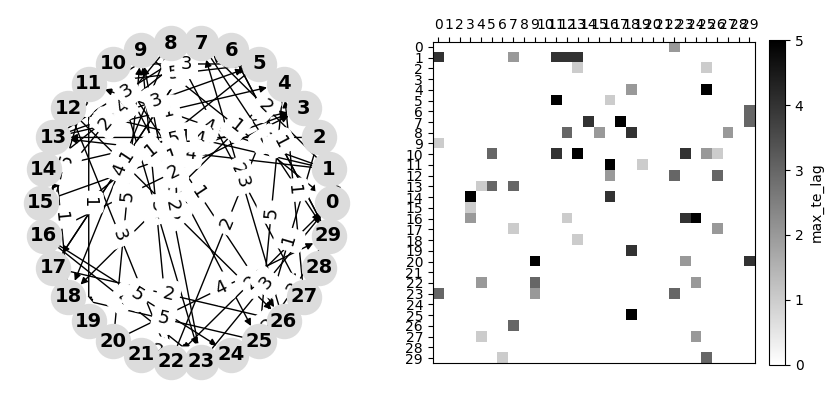

Adding data with properties: 30 processes, 499 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

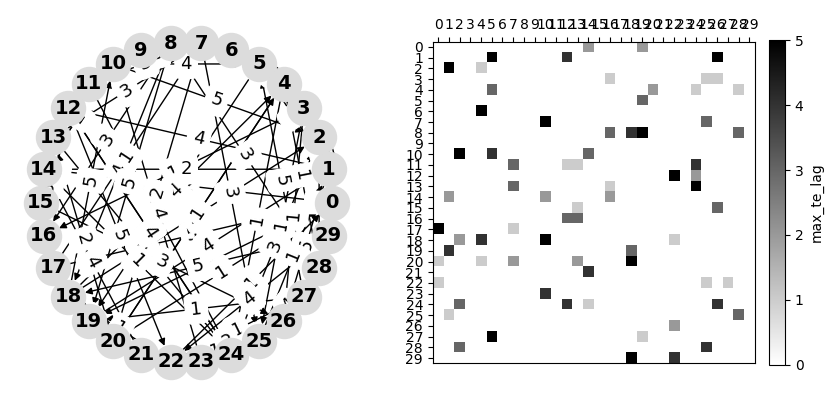

Adding data with properties: 30 processes, 497 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

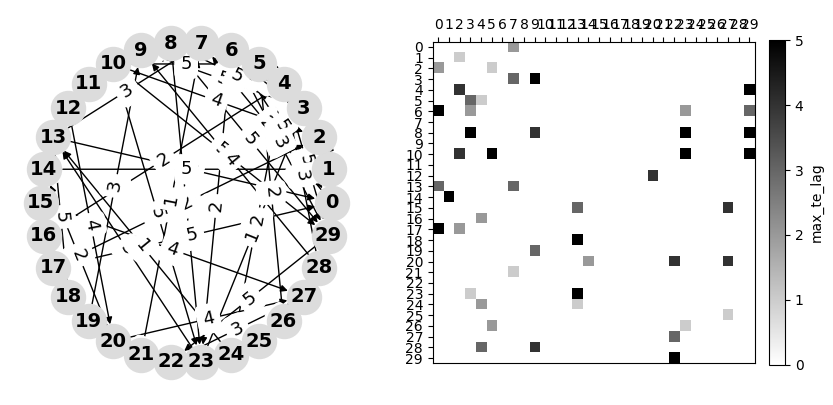

Adding data with properties: 30 processes, 498 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 200
testing candidate: (0, 5) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.in

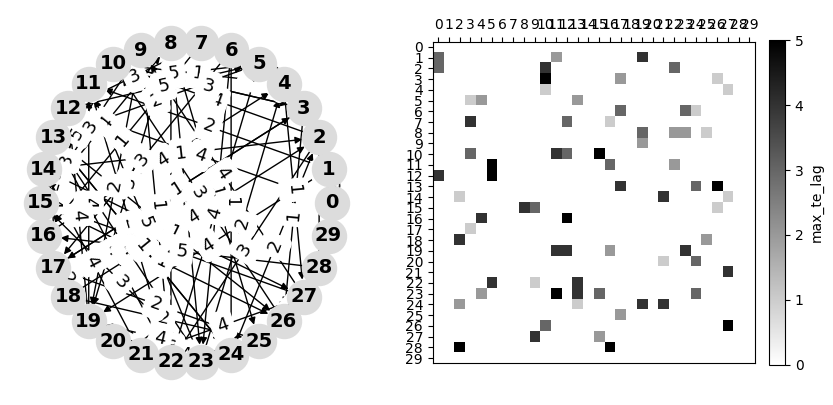

Adding data with properties: 30 processes, 500 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 4) 
maximum statistic, n_perm: 200
testing candidate: (0, 1) maximum statistic, n_perm: 200
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, np.int64(5)), (4, np.in

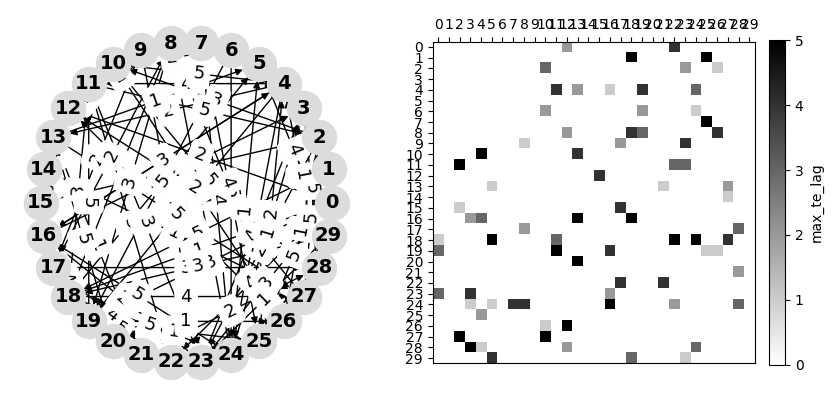

Adding data with properties: 30 processes, 490 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 5) 
maximum statistic, n_perm: 200
 -- not significant

No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates
candidate set: [(1, np.int64(1)), (1, np.int64(2)), (1, np.int64(3)), (1, np.int64(4)), (1, np.int64(5)), (2, np.int64(1)), (2, np.int64(2)), (2, np.int64(3)), (2, np.int64(4)), (2, np.int64(5)), (3, np.int64(1)), (3, np.int64(2)), (3, np.int64(3)), (3, np.int64(4)), (3, 

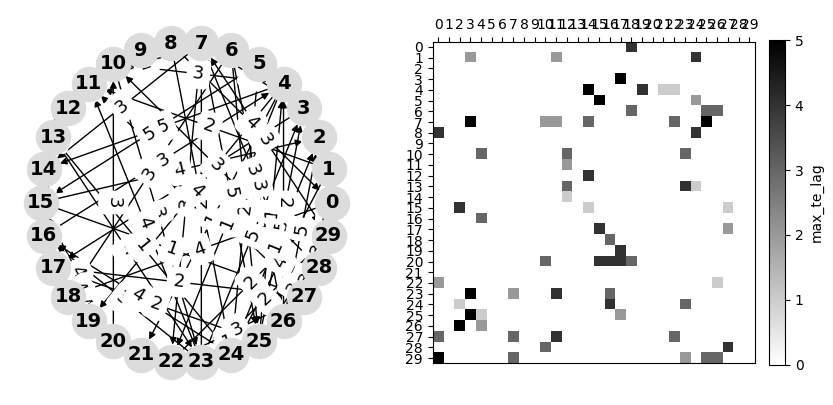

In [19]:
window_len = 2
window_step = 1
windows = preprocess.sliding_window(discrete_log_returns, 
                                    window_len, 
                                    window_step, 
                                    window_unit="years", 
                                    step_unit="years")
endpoints = [end_date for _, end_date, _ in windows]

settings = {
    "cmi_estimator": "JidtDiscreteCMI",
    "max_lag_sources": 5,
    "min_lag_sources": 1,
    "n_discrete_bins": np.max(discrete_log_returns) + 1 
}

windows_results = windows_multi_te(windows, settings)

In [20]:
with open("idtxl_windows_2_1_log_returns_tickers_discrete_equal_freq_3_bins", "wb") as f:
    pickle.dump(windows_results, f)